In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D


In [9]:
grid_x, grid_y = np.mgrid[1:5:5j, 1:5:5j]

In [10]:
input_data = [(1,5,1),
(2,5,2),
(3,5,3),
(4,5,4),
(5,5,5),
(4,4,6),
(3,3,7),
(2,2,8),
(1,1,9),
(2,1,10),
(3,1,11),
(4,1,12),
(5,1,13)]

In [11]:
data = np.empty((5,5))
data[:] = np.nan
for point in input_data:
    data[point[0]-1][point[1]-1] = point[2]
data

array([[  9.,  nan,  nan,  nan,   1.],
       [ 10.,   8.,  nan,  nan,   2.],
       [ 11.,  nan,   7.,  nan,   3.],
       [ 12.,  nan,  nan,   6.,   4.],
       [ 13.,  nan,  nan,  nan,   5.]])

In [12]:
# return a array of indices with 
def interpolate(data):
    while True: # perform until no updates available
        # find most adjacent and update values
        maxAdjacent = 0
        withMaxAdjacent = []
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                if (not np.isnan(data[i][j])):
                    continue
                adjCount = 0
                adjSum = 0
                if (0 < i):
                    if (not np.isnan(data[i-1][j])):
                        adjCount += 1
                        adjSum += data[i-1][j]
    #                     print("#left")
                    if (0 < j):
                        if (not np.isnan(data[i-1][j-1])):
                            adjCount += 1
                            adjSum += data[i-1][j-1]
    #                         print("#top left")
                    if (j < data.shape[1]-1):
                        if (not np.isnan(data[i-1][j+1])):
                            adjCount += 1
                            adjSum += data[i-1][j+1]
    #                         print("#bot left")                
                if (i < data.shape[0]-1):
                    if (not np.isnan(data[i+1][j])):
                        adjCount += 1
                        adjSum += data[i+1][j]
    #                     print("#right")
                    if (0 < j):
                        if (not np.isnan(data[i+1][j-1])):
                            adjCount += 1
                            adjSum += data[i+1][j-1]
    #                         print("#top right")
                    if (j < data.shape[1]-1):
                        if (not np.isnan(data[i+1][j+1])):
                            adjCount += 1
                            adjSum += data[i+1][j+1]
    #                         print("#bot right")
                if (0 < j and not np.isnan(data[i][j-1])):
                    adjCount += 1
                    adjSum += data[i][j-1]
    #                 print("#top")
                if (j < data.shape[1]-1 and not np.isnan(data[i][j+1])):
                    adjCount += 1
                    adjSum += data[i][j+1]
    #                 print("#bot")

                adjAvg = np.nan
                if (0 < adjCount):
                    adjAvg = adjSum/adjCount

                if (adjCount == maxAdjacent):
                    withMaxAdjacent.append((i,j,adjAvg))
                elif (maxAdjacent < adjCount):
                    maxAdjacent = adjCount
                    withMaxAdjacent = [(i,j,adjAvg)]
        
        # no update found exit
        if maxAdjacent == 0:
            break
        
        #perform update
        for point in withMaxAdjacent:
            data[point[0]][point[1]] = point[2]
interpolate(data)

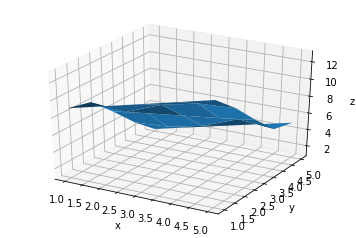

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(grid_x, grid_y, data)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
